# Text-preprocessing

## M1: CountVectorizer

In [3]:
def preprocess_with_count_vectorizer(feature, train_df, test_df, ngram=1):
    train_corpus = train_df[feature]
    test = test_df[feature]
    
    vocab = CountVectorizer(preprocessor=preprocess, min_df=2, max_df=len(train_df), ngram_range=(ngram,ngram)).fit(train_corpus)
    x_train = vocab.transform(train_corpus)
    x_test = vocab.transform(test)
    
    scipy.sparse.save_npz(f'./preprocessed_data/CountVectorizer/train_{feature}_{ngram}grams_countVectorizer.npz', x_train)
    scipy.sparse.save_npz(f'./preprocessed_data/CountVectorizer/test_{feature}_{ngram}grams_countVectorizer.npz', x_test)
    
    return x_train, x_test

In [4]:
#vocab_dict = vocab.vocabulary_

## M2: doc2Vec

In [5]:
import gensim
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

In [6]:
# size of the output vector
vec_size = 100

# function to preprocess and tokenize text
def tokenize_corpus(txt, tokens_only=False, ngram=1):
    for i, line in enumerate(txt):
        line_processed = preprocess(line)
        if ngram == 1:
            tokens = line_processed.split()
        else:
            tokens = list(ngrams(line_processed.split(), n=ngram))
            tokens = [' '.join(token) for token in tokens]
        # tokens = gensim.utils.simple_preprocess(line)
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [7]:
def preprocess_with_doc2vec(feature, train_df, test_df, ngram=1):
    train_corpus = train_df[feature]
    test = test_df[feature]
    # tokenize a training corpus
    corpus = list(tokenize_corpus(train_corpus))
    
    # train doc2vec on the training corpus
    model = gensim.models.doc2vec.Doc2Vec(vector_size=vec_size, min_count=2, epochs=40)
    model.build_vocab(corpus)
    model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)

    # tokenize new documents
    doc_train = list(tokenize_corpus(train_corpus, tokens_only=True, ngram=ngram))
    doc_test = list(tokenize_corpus(test, tokens_only=True, ngram=ngram))
    
    # generate embeddings for the new documents in training set
    x_train = np.zeros((len(doc_train),vec_size))
    for i in range(len(doc_train)):
        x_train[i,:] = model.infer_vector(doc_train[i])

    # generate embeddings for the new documents in test set
    x_test = np.zeros((len(doc_test),vec_size))  # type = numpy.ndarray
    for i in range(len(doc_test)):
        x_test[i,:] = model.infer_vector(doc_test[i])

    # print(x_test)
    # check the shape of doc_emb
    # print(x_train.shape)
    np.savetxt(f'./preprocessed_data/doc2Vec/train_{feature}_{ngram}grams_doc2vec.csv', x_train, delimiter=',')
    np.savetxt(f'./preprocessed_data/doc2Vec/test_{feature}_{ngram}grams_doc2vec.csv', x_test, delimiter=',')
    
    return x_train, x_test

## M3: TfIdf

In [4]:
def preprocess_with_tfidf_vectorizer(feature, train_df, test_df, ngram=1):
    train_corpus = train_df[feature]
    test = test_df[feature]
    
    vocab = TfidfVectorizer(preprocessor=preprocess, min_df=2, max_df=len(train_df), ngram_range=(ngram,ngram), max_features=300).fit(train_corpus)
    x_train = vocab.transform(train_corpus)
    x_test = vocab.transform(test)
    
    scipy.sparse.save_npz(f'./preprocessed_data/TfIdf/train_{feature}_{ngram}grams_tfidf.npz', x_train)
    scipy.sparse.save_npz(f'./preprocessed_data/TfIdf/test_{feature}_{ngram}grams_tfidf.npz', x_test)
    
    return x_train, x_test, vocab.vocabulary_

# Main

## M1: CountVectorizer
```python
# Check
preprocess(train_df['Description'][0])

# Process data
preprocess_with_count_vectorizer('Name', train_df, test_df, ngram=1)
preprocess_with_count_vectorizer('Description', train_df, test_df, ngram=2)
preprocess_with_count_vectorizer('Name', train_df, test_df, ngram=2)
preprocess_with_count_vectorizer('Description', train_df, test_df, ngram=1)
```

## M2: doc2Vec
```python
# Check
list(tokenize_corpus(train_df['Name'], ngram=1))

# Process data
preprocess_with_doc2vec('Name', train_df, test_df, ngram=1)
preprocess_with_doc2vec('Description', train_df, test_df, ngram=2)
preprocess_with_doc2vec('Name', train_df, test_df, ngram=2)
preprocess_with_doc2vec('Description', train_df, test_df, ngram=1)
```

## M3: TfIdfVectorizer
```python
# TfidfVectorizer using the same preprocess() function as CountVectorizer
preprocess_with_tfidf_vectorizer('Name', train_df, test_df, ngram=1)
preprocess_with_tfidf_vectorizer('Description', train_df, test_df, ngram=2)
preprocess_with_tfidf_vectorizer('Name', train_df, test_df, ngram=2)
preprocess_with_tfidf_vectorizer('Description', train_df, test_df, ngram=1)
```

In [ ]:
## M3: TfIdfVectorizer
```python
# TfidfVectorizer using the same preprocess() function as CountVectorizer
preprocess_with_tfidf_vectorizer('Name', train_df, test_df, ngram=1)
preprocess_with_tfidf_vectorizer('Description', train_df, test_df, ngram=2)
preprocess_with_tfidf_vectorizer('Name', train_df, test_df, ngram=2)
preprocess_with_tfidf_vectorizer('Description', train_df, test_df, ngram=1)
```

# Standardization

In [ ]:
# Standardise page number
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import normalize

scaler = MinMaxScaler()
x_full_train['pagesNumber'] = scaler.fit_transform(x_full_train['pagesNumber'].values.reshape(-1, 1))

# Check if imputation is needed for missing values (no)
print(f"The pagesNumber column has {x_full_train['pagesNumber'].isna().sum()} missing values.")
print(f"The pagesNumber column has {(x_full_train['pagesNumber'] == np.inf).sum()} infinite values.")
print(f"The pagesNumber column has {(x_full_train['pagesNumber'] == 0).sum()} zero values.")  # 196 zero values

# Take the log
x_full_train['pagesNumber'] = np.log(1 + x_full_train['pagesNumber'])  # prevent zero devision
print(x_full_train['pagesNumber'][:20])

print(np.mean(x_full_train['pagesNumber']))
print(np.std(x_full_train['pagesNumber']))
print(np.min(x_full_train['pagesNumber']))
print(np.max(x_full_train['pagesNumber']))

## OHE for Authors & Publisher

In [ ]:
def preprocess_string_feature(df, feature, ohe=None):
    # first preprocess the strings
    df[feature] = df[feature].apply(lambda x: preprocess(str(x), stop_words_removal=False, lemmatize=False, min_word_len=0))
    
    if ohe is None:
        ohe = OneHotEncoder(handle_unknown='ignore')
        ohe.fit(df[[feature]])
    
    transformed_col = ohe.transform(df[[feature]])  # a sparse matrix
    transformed_df = pd.DataFrame.sparse.from_spmatrix(transformed_col).set_axis(ohe.categories_[0], axis=1, inplace=False)
    
    return transformed_df, ohe

train_df_author, ohe_author = preprocess_string_feature(train_df, 'Authors')
train_df_publisher, ohe_publisher = preprocess_string_feature(train_df, 'Publisher')
train_df = pd.concat([train_df, train_df_author, train_df_publisher], axis=1)
train_df = train_df.drop(STRING_FEATURES, axis=1)  # drop the original features
train_df

sorted(ohe_author.categories_[0])

In [10]:
train_df_author, ohe_author = preprocess_string_feature(train_df, 'Authors')
train_df_publisher, ohe_publisher = preprocess_string_feature(train_df, 'Publisher')
train_df = pd.concat([train_df, train_df_author, train_df_publisher], axis=1)
train_df = train_df.drop(STRING_FEATURES, axis=1)  # drop the original features
train_df

Name  PublishYear  \
0                     Best of Dr Jean: Reading & Writing         2005   
1                                    Here All Dwell Free         1991   
2                                  Boomer's Big Surprise         2005   
3      I'll Go and Do More: Annie Dodge Wauneka, Nava...         2004   
4                                                     Us         2005   
...                                                  ...          ...   
23058                                 Black Coffee Blues         1997   
23059        America's Champion Swimmer: Gertrude Ederle         2005   
23060                 Crime and Custom in Savage Society         1989   
23061  The Name and Nature of Poetry and Other Select...         1998   
23062                            Redemption (Sevens, #7)         2002   

       PublishMonth  PublishDay  pagesNumber  \
0                 6           1           48   
1                10           1          364   
2                 3          31           32   
3                 9           1          293   
4                 7           7          352   
...             ...         ...          ...   
23058             8           1          120   
23059             6           1           32   
23060             2          15          132   
23061             4          21          136   
23062             7           8          192   

                                             Description  rating_label       \
0      Teachers will turn to this treasury of ideas a...           4.0  0.0   
1      Every human being lives a fairy tale -- an unc...           4.0  0.0   
2      <i>Boomer's Big Surprise</i> will have special...           4.0  0.0   
3      <i>I'll Go and Do More</i> is the story of Ann...           4.0  0.0   
4      Since their days at Oxford, they've gone their...           3.0  0.0   
...                                                  ...           ...  ...   
23058  "If I lose the light of the sun, I will write ...           4.0  0.0   
23059  Trudy Ederle loved to swim, and she was determ...           4.0  0.0   
23060  Bronislaw Malinowski achieved international re...           4.0  0.0   
23061  Lovers of Housman's poetry and admirers of his...           4.0  0.0   
23062  Before the accident, Peter spent every weekend...           4.0  0.0   

       aaron bank  aaron beck  ...  zero three  zoland books  zonderkidz  \
0             0.0         0.0  ...         0.0           0.0         0.0   
1             0.0         0.0  ...         0.0           0.0         0.0   
2             0.0         0.0  ...         0.0           0.0         0.0   
3             0.0         0.0  ...         0.0           0.0         0.0   
4             0.0         0.0  ...         0.0           0.0         0.0   
...           ...         ...  ...         ...           ...         ...   
23058         0.0         0.0  ...         0.0           0.0         0.0   
23059         0.0         0.0  ...         0.0           0.0         0.0   
23060         0.0         0.0  ...         0.0           0.0         0.0   
23061         0.0         0.0  ...         0.0           0.0         0.0   
23062         0.0         0.0  ...         0.0           0.0         0.0   

       zondervan  zondervan academic  zondervan publishing company  \
0            0.0                 0.0                           0.0   
1            0.0                 0.0                           0.0   
2            0.0                 0.0                           0.0   
3            0.0                 0.0                           0.0   
4            0.0                 0.0                           0.0   
...          ...                 ...                           ...   
23058        0.0                 0.0                           0.0   
23059        0.0                 0.0                           0.0   
23060        0.0                 0.0                           0.0   
23061        0.0                 0.0

In [11]:
sorted(ohe_author.categories_[0])

['',
 'aaron bank',
 'aaron beck',
 'aaron hamburger',
 'aaron hass',
 'aaron kramer',
 'aaron latham',
 'aaron mccollough',
 'aaron reynolds',
 'aaron spencer fogleman',
 'aaron travis',
 'abba kovner',
 'abby mann',
 'abd rahman jabarti',
 'abdal hakim murad',
 'abdelwahab bouhdiba',
 'abdul janmohamed',
 'abdul kalam',
 'abdul sattar',
 'abdulaziz sachedina',
 'abigail tabby',
 'abraham eraly',
 'abraham kuyper',
 'abraham malherbe',
 'abraham schmitt',
 'abraham silberschatz',
 'abraham verghese',
 'abram hoffer',
 'abrams',
 'absjorn intonsus',
 'abu hamid ghazali',
 'abul abbas',
 'achim ger',
 'acton figueroa',
 'ada leverson',
 'adam beechen',
 'adam brandenburger',
 'adam copeland',
 'adam fairclough',
 'adam gallardo',
 'adam gamble',
 'adam hamilton',
 'adam haslett',
 'adam kahane',
 'adam kennedy',
 'adam lane',
 'adam mayers',
 'adam morgan',
 'adam phillips',
 'adam smith',
 'adam stemple',
 'adam white',
 'adams',
 'adams sitney',
 'addi booth',
 'addison terry',
 'adel

In [29]:
sorted(vectorizer_name.vocabulary_)

['able team',
 'african american',
 'alexander great',
 'america first',
 'american culture',
 'american girl',
 'american history',
 'american indian',
 'american politics',
 'american revolution',
 'american woman',
 'ancient world',
 'anglo saxon',
 'archive vol',
 'around world',
 'art craft',
 'art therapy',
 'art war',
 'aunt dimity',
 'avant garde',
 'beginner guide',
 'berenstain bear',
 'best american',
 'best friend',
 'best kept',
 'best practice',
 'betty crocker',
 'bible commentary',
 'bible new',
 'bible niv',
 'bible study',
 'big book',
 'black beauty',
 'black lagoon',
 'black white',
 'black woman',
 'board book',
 'book bible',
 'book one',
 'brief history',
 'cam jansen',
 'cambridge companion',
 'catholic church',
 'changed world',
 'chapter book',
 'child book',
 'choose adventure',
 'christian faith',
 'city guide',
 'civil right',
 'civil war',
 'cold war',
 'collected story',
 'collected work',
 'common sense',
 'complete book',
 'complete guide',
 'complete i

In [30]:
sorted(vectorizer_desc.vocabulary_)

['across country',
 'affordable high',
 'african american',
 'age may',
 'along way',
 'also included',
 'also includes',
 'also provides',
 'american culture',
 'american history',
 'answer question',
 'antiquarian book',
 'anyone interested',
 'around world',
 'available part',
 'available purchase',
 'award winning',
 'behind scene',
 'believe work',
 'best book',
 'best friend',
 'best known',
 'best selling',
 'bestselling author',
 'black white',
 'book also',
 'book award',
 'book contains',
 'book cover',
 'book examines',
 'book explores',
 'book facsimile',
 'book feature',
 'book first',
 'book help',
 'book includes',
 'book offer',
 'book one',
 'book present',
 'book provides',
 'book review',
 'book show',
 'book take',
 'book tell',
 'book written',
 'book year',
 'brand new',
 'brings together',
 'case study',
 'change life',
 'child book',
 'civil right',
 'civil war',
 'classic work',
 'cold war',
 'color illustration',
 'color photograph',
 'com book',
 'comic book'

## Transformation

train_df: original training set, with 'Authors', 'Publisher', 'Language' encoded to numerical attributes\
test_df: original test set, with 'Authors', 'Publisher', 'Language' encoded to numerical attributes\
x_full_train: attributes in train_df\
y_train: class labels (rankings) in train_df\
x_full_test: attributes in test_df\
text_matrix: sparse matrix consisting of the 'Description' and 'Name' feature vectors\
numerical_matrix: matrix containing the (encoded) 'Authors', 'Publisher', 'Language' features\
X_train: fully transformed matrix combining text_matrix and numerical_matrix, representing the training set\
X_test: fully transformed matrix combining text_matrix and numerical_matrix, representing the training set


Dimensionality reduction: Truncated singular value decomposition (SVD)\
Unlike PCA, this estimator does not center the data before computing the SVD. This means it can work with sparse matrices efficiently.

In [ ]:
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report

from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.feature_selection import SelectKBest

In [130]:
def transform_to_matrix(description_file, name_file, numerical_file, file_type='npz', dimensionality_reduction=True):
    """
    Reads in and combines the text and numerical features into a single matrix;
    Returns the combined matrix.
    """
    
    # text features: 'Description' and 'Name'
    if file_type == 'npz':
        name_matrix = sparse.load_npz(name_file)
        description_matrix = sparse.load_npz(description_file)
        text_matrix = sparse.hstack((name_matrix, description_matrix))  # bind sparse matrices
    else:
        name_matrix = np.loadtxt(open(name_file, "rb"), delimiter=",")
        description_matrix = np.loadtxt(open(description_file, "rb"), delimiter=",")
        text_matrix = np.hstack((name_matrix, description_matrix))  # bind np arrays
    
    if dimensionality_reduction:
        # Dimensionality reduction on text features
        lda = LatentDirichletAllocation(n_components=20, random_state=30027)
        name_matrix = lda.fit_transform(name_matrix)
        text_matrix = lda.fit_transform(text_matrix)
        #svd = TruncatedSVD(n_components=10, random_state=30027)
        #name_matrix = svd.fit_transform(name_matrix)
        #text_matrix = svd.fit_transform(text_matrix)
    
    numerical_matrix = scipy.sparse.load_npz(numerical_file)
    X = sparse.hstack((numerical_matrix, text_matrix))
    
    return X

In [152]:
# tfidf
DESCRIPTION_TRAIN_SET = './preprocessed_data/TfIdf/train_Description_2grams_tfidf.npz'
NAME_TRAIN_SET = './preprocessed_data/TfIdf/train_Name_2grams_tfidf.npz'
NUMERICAL_TRAIN_SET = './preprocessed_data/train_numerical.npz'

DESCRIPTION_TEST_SET = './preprocessed_data/TfIdf/test_Description_2grams_tfidf.npz'
NAME_TEST_SET = './preprocessed_data/TfIdf/test_Name_2grams_tfidf.npz'
NUMERICAL_TEST_SET = './preprocessed_data/test_numerical.npz'
FILE_TYPE = 'npz'

In [154]:
X_full_train = transform_to_matrix(DESCRIPTION_TRAIN_SET, NAME_TRAIN_SET, NUMERICAL_TRAIN_SET, file_type=FILE_TYPE, dimensionality_reduction=False)
#X_test = transform_to_matrix(DESCRIPTION_TEST_SET, NAME_TEST_SET, NUMERICAL_TEST_SET, file_type=FILE_TYPE)
X_full_train.shape

(23063, 189536)

In [ ]:
import seaborn
df = pd.DataFrame.sparse.from_spmatrix(X_train)
df = df.sparse.to_dense()
y_df = y_train.reset_index()
del y_df['index']

df = pd.concat([df, pd.DataFrame(y_df.values)], ignore_index=True, axis=1)
seaborn.pairplot(df)

In [ ]:
def get_correct_classifications(y_true, y_pred, class_label=None):
    """
    Returns a list of integers, representing the index of the correctly classified instances, 
    in the original training set (original_train_df).
    If class_label is specified, only considers the correct classification in that class.
    """
    
    y_true_copy = y_true.reset_index()  # now a dataframe with two columns, 'index' and 'rating_label'
    if class_label is None:
        match_idx = [i for i in range(len(y_pred)) if y_true_copy.iloc[i,:]['rating_label'] == y_pred[i]]
    
    else: # have a specific class label for interest
        y_true_filtered = y_true_copy[y_true_copy['rating_label'] == class_label]['rating_label']
        y_pred_filtered = pd.Series(y_pred)[y_pred == class_label]
        match_idx = y_true_filtered.index.intersection(y_pred_filtered.index).tolist()  # correct predictions
    
    original_idx = y_true_copy.iloc[match_idx,:]['index']  # index in the original training set
    return original_idx

In [ ]:
# Feature selection
selector = SelectKBest(k=20)
selector.fit(X_train, y_train)
X_train = selector.transform(X_train)
X_val = selector.transform(X_val)
print(X_train.shape)
print(X_val.shape)

In [ ]:
# Check NMI of each column with the rating label
for i in range(X_train.shape[1]):
    print(f"NMI for component {i} =", normalized_mutual_info_score(X_train.iloc[:,i], y_train))

### Combined Classifier by voting

In [ ]:
# combine all nbs by voting
def most_common(predictions):
    return max(set(predictions), key=predictions.count)

nb_pred = []
for predictions in zip(gaussian_pred, categorical_pred, multinomial_pred): 
    nb_pred.append(most_common(predictions))

cm = confusion_matrix(y_val, nb_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
display.plot()
plt.show()
print(classification_report(y_val, nb_pred, zero_division=0))

## Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier

classifiers = [('linearSVM', linearSVM), ('svm_sgd', svm_sgd), ('RBF_svm', RBF_svm), ('knn', knn), ('dtc', dtc)]#, ('logr', logr)]
sc = StackingClassifier(classifiers, verbose = 1)
validate_and_test(sc, X_train, y_train, X_val, y_val)

In [ ]:
evaluate(stacking_clf, X_val, y_val, print_confusion_matrix=True, print_classification_report=True)

## kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# tune hyperparameters p and K
knn = KNeighborsClassifier(weights = 'distance')
param_grid = {'p': [1,2], 'n_neighbors': range(1,11)}
grid_search_result = tune_hyperparameter(knn, param_grid, X_train, y_train)

In [ ]:
grid_search_result
# p=2 (euclidean distance) is generally better
# larger k models prefers label 4.0 and hence results in higher accuracy due to data imbalance

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
validate_and_test(knn, X_train, y_train, X_val, y_val)

## Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# tune hyperparameter max_depth
dtc = DecisionTreeClassifier(random_state = 30027)
param_grid = {'max_depth': range(2,21)}
grid_search_result = tune_hyperparameter(dtc, param_grid, X_train, y_train)

In [ ]:
grid_search_result
# smaller depth converge towards 0R and prefers 4.0 label

In [ ]:
dtc = DecisionTreeClassifier(max_depth=20, random_state = 30027)
validate_and_test(dtc, X_train, y_train, X_val, y_val)

In [ ]:
## kNN

from sklearn.neighbors import KNeighborsClassifier

# tune hyperparameters p and K
knn = KNeighborsClassifier(weights = 'distance')
param_grid = {'p': [1,2], 'n_neighbors': range(1,11)}
grid_search_result = tune_hyperparameter(knn, param_grid, X_train, y_train)

grid_search_result
# p=2 (euclidean distance) is generally better
# larger k models prefers label 4.0 and hence results in higher accuracy due to data imbalance

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
validate_and_test(knn, X_train, y_train, X_val, y_val)

## Decision Tree

from sklearn.tree import DecisionTreeClassifier

# tune hyperparameter max_depth
dtc = DecisionTreeClassifier(random_state = 30027)
param_grid = {'max_depth': range(2,21)}
grid_search_result = tune_hyperparameter(dtc, param_grid, X_train, y_train)

grid_search_result
# smaller depth converge towards 0R and prefers 4.0 label

dtc = DecisionTreeClassifier(max_depth=20, random_state = 30027)
validate_and_test(dtc, X_train, y_train, X_val, y_val)

In [ ]:
## Naive Bayes# Feature selection
selector = SelectKBest(k=100)
selector.fit(X_train, y_train)
X_train_reduced = selector.transform(X_train)
X_val_reduced = selector.transform(X_val)
print(X_train_reduced.shape)
print(X_val_reduced.shape)

## Naive Bayes

In [270]:
X_train_gaussian = X_train[GAUSSIAN_FEATURES]
X_val_gaussian = X_val[GAUSSIAN_FEATURES]
X_train_categorical = X_train[CATEGORICAL_FEATURES]
X_val_categorical = X_val[CATEGORICAL_FEATURES]
X_train_multinomial = X_train[MULTINOMIAL_FEATURES]
X_val_multinomial = X_val[MULTINOMIAL_FEATURES]

In [271]:
from sklearn.preprocessing import OrdinalEncoder

# CategoricalNB works with numbers - but treats them as categorical instead of ordinal features
enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
enc.fit(X_train[CATEGORICAL_FEATURES])
X_train_categorical = pd.DataFrame(enc.transform(X_train[CATEGORICAL_FEATURES]))
X_val_categorical = pd.DataFrame(enc.transform(X_val[CATEGORICAL_FEATURES]))
for feature in X_val_categorical.columns:
    X_val_categorical[feature] = X_val_categorical[feature].replace(-1, X_val_categorical[feature].nunique())

### Predict_proba + Logistic Regression for final prediction

In [280]:
gnb.fit(X_train_gaussian, y_train)
gaussian_pred_training = gnb.predict_proba(X_train_gaussian)
cnb.fit(X_train_categorical, y_train)
categorical_pred_training = cnb.predict_proba(X_train_categorical)
mnb.fit(X_train_multinomial, y_train)
multinomial_pred_training = mnb.predict_proba(X_train_multinomial)
X_meta_training = np.concatenate([gaussian_pred_training, categorical_pred_training, multinomial_pred_training], axis=1)

In [281]:
gaussian_pred_val = gnb.predict_proba(X_val_gaussian)
categorical_pred_val = cnb.predict_proba(X_val_categorical)
multinomial_pred_val = mnb.predict_proba(X_val_multinomial)
X_meta_val = np.concatenate([gaussian_pred_val, categorical_pred_val, multinomial_pred_val], axis=1)

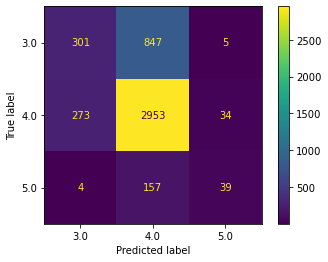

              precision    recall  f1-score   support

         3.0       0.52      0.26      0.35      1153
         4.0       0.75      0.91      0.82      3260
         5.0       0.50      0.20      0.28       200

    accuracy                           0.71      4613
   macro avg       0.59      0.45      0.48      4613
weighted avg       0.68      0.71      0.68      4613



array([4., 4., 4., ..., 4., 4., 4.])

In [282]:
from sklearn.linear_model import LogisticRegression
meta_classifier_lr = LogisticRegression()
meta_classifier_lr.fit(X_meta, y_train)
evaluate(meta_classifier_lr, X_meta_val, y_val, print_confusion_matrix=True, print_classification_report=True)

In [570]:
# np array needs to use index
GAUSSIAN_FEATURES_ID = [1,3]
CATEGORICAL_FEATURES_ID = [0,2]
MULTINOMIAL_FEATURES_ID = list(range(4,X_train.shape[1]))

FEATURE_SETS = [GAUSSIAN_FEATURES, CATEGORICAL_FEATURES, MULTINOMIAL_FEATURES]
FEATURE_SETS


[['PublishYear', 'pagesNumber'],
 ['Authors', 'Publisher'],
 ['survival_guide',
  'everything_need',
  'need_know',
  'civil_right',
  'story_behind',
  'every_day',
  'chapter_book',
  'eighteenth_century',
  'new_world',
  'short_trip',
  'van_gogh',
  'fairy_tale',
  'anglo_saxon',
  'lesbian_gay',
  'early_modern',
  'modern_england',
  'book_modern',
  'stony_man',
  'spider_man',
  'new_selected',
  'selected_poem',
  'volume_one',
  'true_story',
  'new_testament',
  'bible_study',
  'one_man',
  'jigsaw_jones',
  'middle_age',
  'captain_underpants',
  'world_war',
  'reader_level',
  'oxford_dictionary',
  'ancient_world',
  'star_trek',
  'able_team',
  'travel_writing',
  'life_death',
  'world_history',
  'appalachian_trail',
  'seventeenth_century',
  'life_lesson',
  'great_book',
  'complete_book',
  'robert_lee',
  'rise_fall',
  'second_chance',
  'nancy_drew',
  'best_friend',
  'guide_understanding',
  'revised_updated',
  'practical_guide',
  'art_craft',
  'jane_au

In [571]:
from sklearn.metrics import accuracy_score


class StackingNB():

    def __init__(self, classifiers, metaclassifier):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier
        self.feature_sets = FEATURE_SETS

    def fit(self, X, y):
        base_preds = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            clf.fit(X[feature_set], y)  # classifier uses a subset of features
        
        X_meta = self._predict_base(X) # output of the base classifiers = input for meta-classifier
        self.metaclassifier.fit(X_meta, y) #output of the base classifiers is the input for the meta classifier
        return self
    
    def _predict_base(self, X):
        y_hats = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            y_hat = clf.predict(X[feature_set])
            y_hats.append(y_hat)
        
        y_hats = pd.DataFrame({'GaussianNB_pred' : y_hats[0],
                               'CategoricalNB_pred' : y_hats[1],
                               'MultinomialNB_pred' : y_hats[2]})
        assert y_hats.shape[0] == X.shape[0] # check that the number of rows yhats matches the number of rows in the input data X
        return y_hats
    
    def predict(self, X):
        X_meta = self._predict_base(X)
        y_hat = self.metaclassifier.predict(X_meta)
        return y_hat
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return accuracy_score(y, y_hat)

In [591]:
def replace_negative(arr, columns, encoder):
    df = pd.DataFrame(arr, columns=columns)
    print(df)
    for i in range(len(CATEGORICAL_FEATURES_ID)): 
        df[CATEGORICAL_FEATURES[i]] = df[CATEGORICAL_FEATURES[i]].replace(-1, encoder.categories_[i].size)
    return df

In [592]:
from sklearn.preprocessing import FunctionTransformer

categorical_preprocessor = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_preprocessor.fit(train_df[CATEGORICAL_FEATURES])

preprocessor = ColumnTransformer([
    ('cat_preprocessor', categorical_preprocessor, CATEGORICAL_FEATURES_ID)],
    remainder='passthrough', sparse_threshold=0)

df_converter = FunctionTransformer(replace_negative, kw_args={'columns': X_train.columns, 'encoder':categorical_preprocessor})

# meta_classifier = CategoricalNB
base_classifiers = [GaussianNB(),
                    CategoricalNB(alpha = 1),
                    MultinomialNB()]
meta_classifier = CategoricalNB()

snb = Pipeline([
    ("preprocessor", preprocessor), 
    ("converter", df_converter),
    ("classifier", StackingNB(base_classifiers, meta_classifier))])  # uses Stochastic Average Gradient descent solver
snb


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [0, 2])])),
                ('converter',
                 FunctionTransformer(func=<function replace_negative at 0x1e892b8b0>,
                                     kw_args={'columns': Index(['Authors', 'PublishYear', 'Publisher', 'page...
       'everything_need', 'need_know', 'civil_right', 'story_behind',
       'every_day',
       ...
       'book first', 'three decade', 'wall street', 'little girl',
       'comic book', 'million copy', 'help student', 'old testament',
       'orson scott', 'scott card'],
      dtype='object', length=604),
                                              'encoder': OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                        unknown_value=-1)})),
                ('classifier', <__main__.StackingNB object at 0x1e8930520>)])

In [593]:
snb.fit(X_train, y_train)
evaluate(snb, X_val, y_val)

       Authors  PublishYear  Publisher  pagesNumber  survival_guide  \
0       3351.0       2163.0       13.0          0.0             0.0   
1      12783.0       2183.0       13.0          0.0             0.0   
2       4710.0       1968.0       13.0          1.0             0.0   
3      10773.0       2299.0       13.0          0.0             0.0   
4       5736.0       1184.0       13.0          2.0             0.0   
...        ...          ...        ...          ...             ...   
18445   2939.0       2984.0       13.0          3.0             0.0   
18446   8150.0       2982.0       10.0          0.0             0.0   
18447   8925.0       1447.0       13.0          1.0             0.0   
18448   3194.0       1962.0       13.0          2.0             0.0   
18449   5528.0       2755.0       12.0          2.0             0.0   

       everything_need  need_know  civil_right  story_behind  every_day  ...  \
0                  0.0        0.0          0.0           0.0       

IndexError: index 13546 is out of bounds for axis 1 with size 13546

Evaluate on training set:

StackingNB prediction took 15.361557960510254 seconds
    test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0            0.320197           0.791098           0.127660       0.670639
1            0.357647           0.782293           0.093023       0.668472
2            0.377171           0.811159           0.177778       0.700975
3            0.384075           0.794182           0.090909       0.682557
4            0.372960           0.787172           0.133333       0.674973
5            0.320802           0.792291           0.217391       0.676056
6            0.392344           0.811552           0.139535       0.700975
7            0.345324           0.790159           0.255319       0.676056
8            0.418605           0.805839           0.173913       0.699892
9            0.364045           0.781457           0.095238       0.665222
10           0.387850           0.795918           0.136364       0.685466
11           0.3576

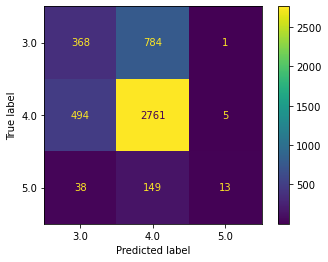

              precision    recall  f1-score   support

         3.0       0.41      0.32      0.36      1153
         4.0       0.75      0.85      0.79      3260
         5.0       0.68      0.07      0.12       200

    accuracy                           0.68      4613
   macro avg       0.61      0.41      0.42      4613
weighted avg       0.66      0.68      0.66      4613



In [334]:
# meta classifier = LogisticRegression
meta_classifier_lr = LogisticRegression()
snb_lr = StackingNB(base_classifiers, meta_classifier_lr)
snb_lr.fit(X_train, y_train)
final_pred = validate_and_test(snb_lr, X_train, y_train, X_val, y_val)
# yields similar result

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", 
     RandomForestClassifier(random_state=30027, max_samples=0.5, max_features='log2', criterion='entropy', n_estimators=5))])

In [ ]:
param_grid = {
    'classifier__n_estimators': (5, 10, 20, 50, 100),
    'classifier__max_samples': (0.3, 0.5, 0.7), 
    'classifier__max_features': (0.3, 0.5, 0.7)}
cv_results = tune_hyperparameter(rf, param_grid, X_train, y_train, cv=3)
cv_results

In [ ]:
cv_results.iloc[35,0]
# but max_features='log2' works better than 0.7

In [ ]:
rf.fit(X_train, y_train)
evaluate(rf, X_val, y_val)

In [ ]:
# Linear SVM using Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

# learning_rate='optimal' predicts most 4s as 3s
# validation accuracy stops increasing for eta0 < 0.0000001
svm_sgd = SGDClassifier(learning_rate='adaptive', eta0 = 0.0000001)  # default: loss='hinge' -> gives a linear SVM
svm_sgd = SVM(svm_sgd)
svm_sgd.fit(X_train, y_train)
evaluate(svm_sgd, X_val, y_val)

# SVM Class

In [ ]:
### Linear

# First try with Linear SVM
linearSVM = svm.LinearSVC(random_state=30027)
param_grid = {'C': range(1,102,10)}
tune_hyperparameter(linearSVM, param_grid, X_ohe_full, y, cv=5)

# Narrow down
linearSVM = svm.LinearSVC(random_state=30027)
param_grid = {'C': range(85, 95)}
tune_hyperparameter(linearSVM, param_grid, X_ohe_full, y, cv=3)

linearSVM = svm.LinearSVC(random_state=30027, C=93)
linearSVM.fit(X_ohe_selected, y_train)
cv_evaluate(linearSVM, X_ohe_selected, y)class SVM(ClassifierMixin, BaseEstimator):

    def __init__(self, classifier, C=-1, gamma=-1):
        self.classifier = classifier
        self.encoder = OHE
        self.selector = SelectKBest(k=100)
        self.C = C
        self.gamma = gamma
        if (C != -1): 
            self.classifier.C = C
        if (gamma != -1): 
            self.classifier.gamma = gamma
        self.classes_ = []

    def fit(self, X, y):
        X_transformed = self._transform_categorical(X)
        self.classifier.fit(self.selector.fit_transform(X_transformed, y), y)
        self.classes_ = self.classifier.classes_
        return self
    
    def predict(self, X):
        X_transformed = self._transform_categorical(X)
        return self.classifier.predict(self.selector.transform(X_transformed))
    
    def predict_proba(self, X): 
        X_transformed = self._transform_categorical(X)
        return self.classifier.predict_proba(self.selector.transform(X_transformed))
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return accuracy_score(y, y_hat)
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        self.classifier.set_params(**parameters)
        return self
    
    def _transform_categorical(self, X): 
        X = X.copy().reset_index(drop=True)
        transformed_cat_df = self._transform_categorical_features(X[CATEGORICAL_FEATURES], self.encoder)
        X = pd.concat([X, transformed_cat_df], axis=1).drop(CATEGORICAL_FEATURES, axis=1)  # remove the original features
        return X
    
    def _transform_categorical_features(self, X, ohe):
        transformed_mat = ohe.transform(X)  # a sparse matrix
        transformed_df = pd.DataFrame(transformed_mat).set_axis(ohe.get_feature_names_out(), axis=1, inplace=False)
        return transformed_df

### Linear

In [21]:
# First try with Linear SVM
linearSVM = svm.LinearSVC(random_state=30027)
param_grid = {'C': range(1,102,10)}
tune_hyperparameter(linearSVM, param_grid, X_ohe_full, y, cv=5)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] END ................................................C=1; total time=   6.1s
[CV] END ................................................C=1; total time=   6.1s
[CV] END ................................................C=1; total time=   6.2s
[CV] END ................................................C=1; total time=   6.2s
[CV] END ................................................C=1; total time=   6.6s
[CV] END ...............................................C=11; total time=   6.5s
[CV] END ...............................................C=11; total time=   6.4s
[CV] END ...............................................C=11; total time=   6.4s
[CV] END ...............................................C=11; total time=   6.4s
[CV] END ...............................................C=11; total time=   6.4s
[CV] END ...............................................C=21; total time=   6.4s
[CV] END .......................................

params  mean_test_3.0_precision  std_test_3.0_precision  \
0     {'C': 1}                 0.515153                0.013062   
1    {'C': 11}                 0.424720                0.069845   
2    {'C': 21}                 0.459453                0.170122   
3    {'C': 31}                 0.428744                0.073634   
4    {'C': 41}                 0.451168                0.130420   
5    {'C': 51}                 0.563270                0.091559   
6    {'C': 61}                 0.440812                0.131251   
7    {'C': 71}                 0.508983                0.115902   
8    {'C': 81}                 0.446389                0.117618   
9    {'C': 91}                 0.576891                0.024017   
10  {'C': 101}                 0.463027                0.081625   

    rank_test_3.0_precision  mean_test_3.0_recall  std_test_3.0_recall  \
0                         3              0.290587             0.011042   
1                        11              0.504137             0.177955   
2                         6              0.514418             0.343618   
3                        10              0.473524             0.174780   
4                         7              0.487882             0.296944   
5                         2              0.218790             0.129003   
6                         9              0.488523             0.349434   
7                         4              0.345660             0.251118   
8                         8              0.483919             0.265771   
9                         1              0.161154             0.033152   
10                        5              0.389555             0.206704   

    rank_test_3.0_recall  mean_test_3.0_f1-score  std_test_3.0_f1-score  \
0                      9                0.371235               0.005780   
1                      2                0.430337               0.045645   
2                      1                0.342042               0.147387   
3                      6                0.416323               0.056948   
4                      4                0.375210               0.093843   
5                     10                0.280614               0.112187   
6                      3                0.346863               0.094164   
7                      8                0.336618               0.088267   
8                      5                0.380462               0.107247   
9                     11                0.249433               0.041809   
10                     7                0.373296               0.086883   

    rank_test_3.0_f1-score  ...  rank_test_5.0_precision  \
0                        6  ...                        1   
1                        1  ...                        2   
2                        8  ...                        4   
3                        2  ...                        6   
4                        4  ...                       11   
5                       10  ...                       10   
6                        7  ...                        3   
7                        9  ...                        5   
8                        3  ...                        8   
9                       11  ...                        7   
10                       5  ...                        9   

    mean_test_5.0_recall  std_test_5.0_recall  rank_test_5.0_recall  \
0               0.198787             0.027009                    10   
1               0.208746             0.071250                     8   
2               0.202741             0.050568                     9   
3               0.224978             0.043922                     5   
4               0.263286             0.079254                     2   
5               0.280605             0.175093                     1   
6               0.190731             0.048116                    11   
7               0.211903             0.024907                     7   
8               0.232110             0.069533        

In [22]:
# Narrow down
linearSVM = svm.LinearSVC(random_state=30027)
param_grid = {'C': range(85, 95)}
tune_hyperparameter(linearSVM, param_grid, X_ohe_full, y, cv=3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...............................................C=85; total time=   5.6s
[CV] END ...............................................C=85; total time=   5.5s
[CV] END ...............................................C=85; total time=   5.4s
[CV] END ...............................................C=86; total time=   5.5s
[CV] END ...............................................C=86; total time=   5.4s
[CV] END ...............................................C=86; total time=   5.4s
[CV] END ...............................................C=87; total time=   5.6s
[CV] END ...............................................C=87; total time=   5.4s
[CV] END ...............................................C=87; total time=   5.6s
[CV] END ...............................................C=88; total time=   5.6s
[CV] END ...............................................C=88; total time=   5.6s
[CV] END .......................................

params  mean_test_3.0_precision  std_test_3.0_precision  \
0  {'C': 85}                 0.414334                0.050811   
1  {'C': 86}                 0.472643                0.092225   
2  {'C': 87}                 0.464826                0.073156   
3  {'C': 88}                 0.492649                0.042187   
4  {'C': 89}                 0.445579                0.103760   
5  {'C': 90}                 0.350190                0.039104   
6  {'C': 91}                 0.470543                0.090178   
7  {'C': 92}                 0.483794                0.104373   
8  {'C': 93}                 0.546340                0.024294   
9  {'C': 94}                 0.522116                0.017162   

   rank_test_3.0_precision  mean_test_3.0_recall  std_test_3.0_recall  \
0                        9              0.468600             0.172974   
1                        5              0.347346             0.245798   
2                        7              0.316658             0.173248   
3                        3              0.239759             0.071727   
4                        8              0.438340             0.300367   
5                       10              0.670561             0.167592   
6                        6              0.335922             0.243775   
7                        4              0.326195             0.267434   
8                        1              0.190133             0.061960   
9                        2              0.217086             0.046876   

   rank_test_3.0_recall  mean_test_3.0_f1-score  std_test_3.0_f1-score  \
0                     2                0.415250               0.033919   
1                     4                0.327750               0.093450   
2                     7                0.334813               0.074519   
3                     8                0.312340               0.049164   
4                     3                0.357778               0.061797   
5                     1                0.445465               0.018410   
6                     5                0.318738               0.099157   
7                     6                0.298641               0.111457   
8                    10                0.275042               0.062069   
9                     9                0.303242               0.045051   

   rank_test_3.0_f1-score  ...  rank_test_5.0_precision  mean_test_5.0_recall  \
0                       2  ...                       10              0.328075   
1                       5  ...                        4              0.235183   
2                       4  ...                        3              0.209909   
3                       7  ...                        2              0.198785   
4                       3  ...                        1              0.188639   
5                       1  ...                        9              0.306689   
6                       6  ...                        8              0.267430   
7                       9  ...                        7              0.239205   
8                      10  ...                        6              0.221993   
9                       8  ...                        5              0.210858   

   std_test_5.0_recall  rank_test_5.0_recall  mean_test_5.0_f1-score  \
0             0.087429                     1                0.243546   
1             0.080479                     5                0.269321   
2             0.071861                     8                0.261365   
3             0.017509                     9                0.278690   
4             0.047944                    10                0.264292   
5             0.092691                     2                0.274539   
6             0.141943                     3                0.220360   
7             0.127853                     4                0.220071   
8             0.040954                     6                0.276839   
9             0.044674                     7               

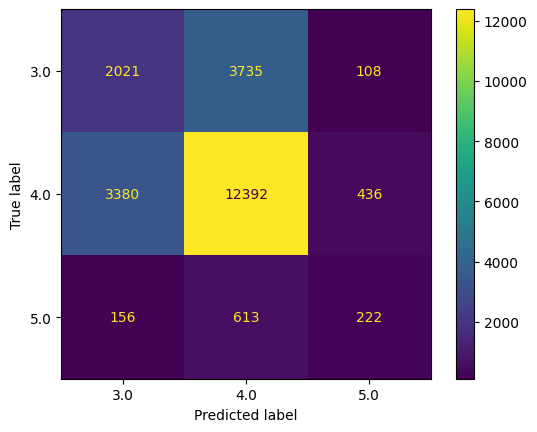

              precision    recall  f1-score   support

         3.0       0.36      0.34      0.35      5864
         4.0       0.74      0.76      0.75     16208
         5.0       0.29      0.22      0.25       991

    accuracy                           0.63     23063
   macro avg       0.46      0.44      0.45     23063
weighted avg       0.63      0.63      0.63     23063



array([4., 4., 4., ..., 4., 4., 4.])

In [24]:
linearSVM = svm.LinearSVC(random_state=30027, C=93)
linearSVM.fit(X_ohe_selected, y_train)
cv_evaluate(linearSVM, X_ohe_selected, y)

# Boosting with Decision Trees

In [4]:
from sklearn.ensemble import 

hgb = HistGradientBoostingClassifier(random_state=30027)

In [5]:
# Tuning using GridSearch
param_grid = {
    'learning_rate': (0.01, 0.1, 1, 10),
    'max_leaf_nodes': (3, 10, 30)}
cv_results = tune_hyperparameter(hgb, param_grid, X, y, cv=5)
cv_results
# 'Best' param set: learning_rate = 0.1, max_leaf_nodes = 10

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...............learning_rate=0.01, max_leaf_nodes=3; total time=   8.9s
[CV] END ...............learning_rate=0.01, max_leaf_nodes=3; total time=  10.1s
[CV] END ...............learning_rate=0.01, max_leaf_nodes=3; total time=   6.3s
[CV] END ...............learning_rate=0.01, max_leaf_nodes=3; total time=   5.7s
[CV] END ...............learning_rate=0.01, max_leaf_nodes=3; total time=   5.7s
[CV] END ..............learning_rate=0.01, max_leaf_nodes=10; total time=  10.5s
[CV] END ..............learning_rate=0.01, max_leaf_nodes=10; total time=  10.3s
[CV] END ..............learning_rate=0.01, max_leaf_nodes=10; total time=  10.8s
[CV] END ..............learning_rate=0.01, max_leaf_nodes=10; total time=   9.9s
[CV] END ..............learning_rate=0.01, max_leaf_nodes=10; total time=  14.5s
[CV] END ..............learning_rate=0.01, max_leaf_nodes=30; total time=  21.2s
[CV] END ..............learning_rate=0.01, max_l

params  mean_test_3.0_precision  \
0    {'learning_rate': 0.01, 'max_leaf_nodes': 3}                 0.907009   
1   {'learning_rate': 0.01, 'max_leaf_nodes': 10}                 0.793173   
2   {'learning_rate': 0.01, 'max_leaf_nodes': 30}                 0.681679   
3     {'learning_rate': 0.1, 'max_leaf_nodes': 3}                 0.701018   
4    {'learning_rate': 0.1, 'max_leaf_nodes': 10}                 0.631133   
5    {'learning_rate': 0.1, 'max_leaf_nodes': 30}                 0.580474   
6       {'learning_rate': 1, 'max_leaf_nodes': 3}                 0.512421   
7      {'learning_rate': 1, 'max_leaf_nodes': 10}                 0.500399   
8      {'learning_rate': 1, 'max_leaf_nodes': 30}                 0.397091   
9      {'learning_rate': 10, 'max_leaf_nodes': 3}                 0.202070   
10    {'learning_rate': 10, 'max_leaf_nodes': 10}                 0.133294   
11    {'learning_rate': 10, 'max_leaf_nodes': 30}                 0.181517   

    std_test_3.0_precision  rank_test_3.0_precision  mean_test_3.0_recall  \
0                 0.080966                        1              0.006310   
1                 0.117631                        2              0.010914   
2                 0.052394                        4              0.024557   
3                 0.062027                        3              0.022170   
4                 0.027278                        5              0.042975   
5                 0.016083                        6              0.060026   
6                 0.163900                        7              0.038364   
7                 0.043559                        8              0.073501   
8                 0.022618                        9              0.082881   
9                 0.012827                       10              0.204152   
10                0.079837                       12              0.071454   
11                0.108104                       11              0.100461   

    std_test_3.0_recall  rank_test_3.0_recall  mean_test_3.0_f1-score  \
0              0.002507                    12                0.012519   
1              0.003117                    11                0.021513   
2              0.004713                     9                0.047342   
3              0.005313                    10                0.042887   
4              0.005441                     7                0.080362   
5              0.006010                     6                0.108729   
6              0.022328                     8                0.070036   
7              0.015244                     4                0.127622   
8              0.013243                     3                0.136839   
9              0.102660                     1                0.183404   
10             0.056485                     5                0.088686   
11             0.107642                     2                0.116022   

    std_test_3.0_f1-score  rank_test_3.0_f1-score  ...  \
0                0.004946                      12  ...   
1                0.006113                      11  ...   
2                0.008826                       9  ...   
3                0.010052                      10  ...   
4                0.009478                       7  ...   
5                0.009983                       5  ...   
6                0.039377                       8  ...   
7                0.024165                       3  ...   
8                0.019338                       2  ...   
9                0.068782                       1  ...   
10               0.066529                       6  ...   
11               0.115555                       4  ...   

    rank_test_5.0_precision  mean_test_5.0_recall  std_test_5.0_recall  \
0                         6              0.023182             0.016699   
1                         1              0.028232             0.012113   
2                         1              0.028232             0.012113   
3                        

In [6]:
# 2nd go
hgb = HistGradientBoostingClassifier(random_state=30027, learning_rate=0.1)
param_grid = {
    'max_leaf_nodes': range(8, 20, 2)}
cv_results = tune_hyperparameter(hgb, param_grid, X, y, cv=3)
cv_results
# 'Best' param set: learning_rate = 0.01, max_leaf_nodes = 10

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...................................max_leaf_nodes=8; total time=   5.4s
[CV] END ...................................max_leaf_nodes=8; total time=   5.2s
[CV] END ...................................max_leaf_nodes=8; total time=   7.0s
[CV] END ..................................max_leaf_nodes=10; total time=   3.7s
[CV] END ..................................max_leaf_nodes=10; total time=   5.7s
[CV] END ..................................max_leaf_nodes=10; total time=  11.3s
[CV] END ..................................max_leaf_nodes=12; total time=  11.7s
[CV] END ..................................max_leaf_nodes=12; total time=   7.6s
[CV] END ..................................max_leaf_nodes=12; total time=  14.3s
[CV] END ..................................max_leaf_nodes=14; total time=   5.1s
[CV] END ..................................max_leaf_nodes=14; total time=   5.5s
[CV] END ..................................max_le

params  mean_test_3.0_precision  std_test_3.0_precision  \
0   {'max_leaf_nodes': 8}                 0.577106                0.022875   
1  {'max_leaf_nodes': 10}                 0.589221                0.034076   
2  {'max_leaf_nodes': 12}                 0.580391                0.036792   
3  {'max_leaf_nodes': 14}                 0.582113                0.034280   
4  {'max_leaf_nodes': 16}                 0.580458                0.035041   
5  {'max_leaf_nodes': 18}                 0.568537                0.032370   

   rank_test_3.0_precision  mean_test_3.0_recall  std_test_3.0_recall  \
0                        5              0.039392             0.008050   
1                        1              0.043485             0.009040   
2                        4              0.047578             0.006175   
3                        2              0.052011             0.008656   
4                        3              0.052693             0.007016   
5                        6              0.056274             0.009395   

   rank_test_3.0_recall  mean_test_3.0_f1-score  std_test_3.0_f1-score  \
0                     6                0.073626               0.014199   
1                     5                0.080834               0.015784   
2                     4                0.087888               0.010804   
3                     3                0.095397               0.014972   
4                     2                0.096572               0.012301   
5                     1                0.102304               0.016087   

   rank_test_3.0_f1-score  ...  rank_test_5.0_precision  mean_test_5.0_recall  \
0                       6  ...                        1              0.035305   
1                       5  ...                        2              0.037322   
2                       4  ...                        5              0.037322   
3                       3  ...                        3              0.037322   
4                       2  ...                        4              0.036315   
5                       1  ...                        6              0.039342   

   std_test_5.0_recall  rank_test_5.0_recall  mean_test_5.0_f1-score  \
0             0.009935                     6                0.067676   
1             0.011091                     2                0.071210   
2             0.011091                     2                0.071072   
3             0.011091                     2                0.071163   
4             0.009837                     5                0.069351   
5             0.011283                     1                0.074718   

   std_test_5.0_f1-score  rank_test_5.0_f1-score  mean_test_accuracy  \
0               0.018335                       6            0.706890   
1               0.020310                       2            0.707540   
2               0.020249                       4            0.707540   
3               0.020365                       3            0.708147   
4               0.018115                       5            0.708017   
5               0.020704                       1            0.707887   

   std_test_accuracy  rank_test_accuracy  
0           0.001118                   6  
1           0.001456                   4  
2           0.001426                   5  
3           0.001749                   1  
4           0.001631                   2  
5           0.001981                   3  

[6 rows x 31 columns]

HistGradientBoostingClassifier prediction took 98.96163487434387 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.153846           0.824818           0.019608       0.708713
1           0.123123           0.822673           0.039216       0.704378
2           0.112805           0.823560           0.057692       0.705245
3           0.133531           0.823683           0.096154       0.706418
4           0.153153           0.828341           0.112150       0.714224
5           0.105590           0.825907           0.111111       0.708586
6           0.114198           0.827282           0.148148       0.711188
7           0.105263           0.824961           0.057692       0.706852
8           0.139881           0.824941           0.093458       0.708153
9           0.116923           0.827372           0.076923       0.710321


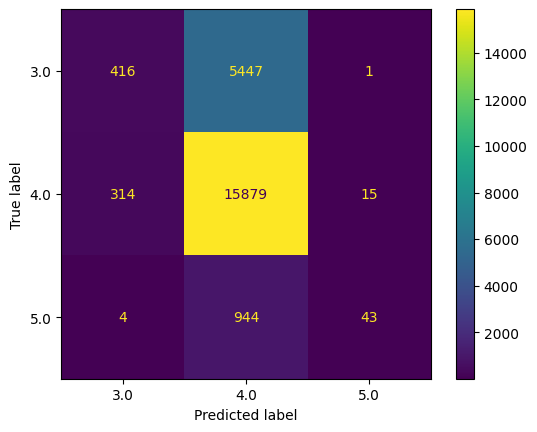

test_3.0_f1-score    0.125831
test_4.0_f1-score    0.825354
test_5.0_f1-score    0.081215
test_accuracy        0.708408
dtype: float64

In [7]:
hgb = HistGradientBoostingClassifier(random_state=30027, max_leaf_nodes=30, learning_rate=0.1)
hgb.fit(X, y)
cross_val_report(hgb, X, y)[1]

# Kernel SVM

In [1]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [2]:
train_df_ohe_selected = pd.read_csv(DATASET_DIR + "/train_df_ohe_selected_50.csv", keep_default_na=False)

In [3]:
y = train_df_ohe_selected.iloc[:,-1]
X = train_df_ohe_selected.iloc[:,:-1]

In [4]:
from sklearn import svm

In [5]:
RBF_svm = svm.SVC(kernel='rbf')

In [ ]:
# tune hyperparameter C and gamma
param_grid = {'C': range(1, 101, 25), 'gamma': [0.1, 0.3, 0.5, 0.7, 0.9]}
tune_hyperparameter(RBF_svm, param_grid, X, y, cv=3)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .....................................C=1, gamma=0.1; total time= 1.8min
[CV] END .....................................C=1, gamma=0.1; total time= 1.8min
[CV] END .....................................C=1, gamma=0.1; total time= 1.8min
[CV] END .....................................C=1, gamma=0.3; total time= 2.3min
[CV] END .....................................C=1, gamma=0.3; total time= 2.8min
[CV] END .....................................C=1, gamma=0.3; total time= 2.8min
[CV] END .....................................C=1, gamma=0.5; total time= 2.6min
[CV] END .....................................C=1, gamma=0.5; total time= 2.3min
[CV] END .....................................C=1, gamma=0.5; total time= 2.4min
[CV] END .....................................C=1, gamma=0.7; total time= 2.6min
[CV] END .....................................C=1, gamma=0.7; total time= 2.5min
[CV] END .....................................C=

In [ ]:
RBF_svm = svm.SVC(kernel='rbf', C=10, gamma=0.1)
RBF_svm.fit(X, y)
cross_val_report(RBF_svm, X, y)[1]
# Kernel SVM performs slightly better on weighted avg precision & recall than Linear SVM

In [ ]:
# Kernel SVM is way too slow with the full feature set - let's do dimensionality reduction
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=5, random_state=30027)
X_reduced = tsvd.fit_transform(X)
X_reduced

In [ ]:
RBF_svm = svm.SVC(kernel='rbf', C=10, gamma=0.1)
RBF_svm.fit(X_reduced, y)
cross_val_report(RBF_svm, X_reduced, y)[1]

In [ ]:
selector = SelectFromModel(RBF_svm, prefit=True).fit(X, y)
print("RBF SVM Coefficients:", selector.estimator_.coef_)
print("Selector threshold:", selector.threshold_)
selected_features = [X.columns[i] for i in range(X.shape[1]) if selector.get_support()[i]]
print(len(selected_features), "features selected")
X_filtered = X[selected_features]

In [ ]:
RBF_svm = svm.SVC(kernel='rbf', C=10, gamma=0.1)
RBF_svm.fit(X_filtered, y)
cross_val_report(RBF_svm, X_filtered, y)[1]

## 1) Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
RF_FEATURES = chi2_select_features(X_train, y_train)
RF_FEATURES.remove('PublishDay')

rf = RandomForestClassifier(random_state=30027, 
                            max_samples=0.3, max_features='log2', 
                            criterion='entropy', n_estimators=100, 
                            oob_score=True)

RandomForestClassifier prediction took 24.11880326271057 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.571429    0.143101      0.228883       0.723305    0.961135   
1       0.576000    0.122658      0.202247       0.721531    0.965453   
2       0.565574    0.117747      0.194915       0.720202    0.965453   
3       0.482014    0.114334      0.184828       0.719331    0.954966   
4       0.559701    0.127986      0.208333       0.723739    0.964837   
5       0.633028    0.117747      0.198561       0.723394    0.972856   
6       0.557971    0.131399      0.212707       0.722763    0.961752   
7       0.614035    0.119454      0.200000       0.722400    0.972856   
8       0.628099    0.129472      0.214689       0.723963    0.969753   
9       0.626984    0.134583      0.221599       0.724838    0.969136   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.825430       0.500000    0.030303      0.057143  0.

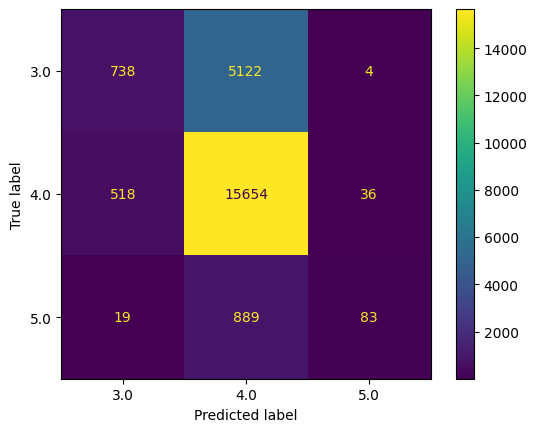

mean       std
3.0_precision  0.581484  0.046267
3.0_recall     0.125848  0.009051
3.0_f1-score   0.206676  0.013186
4.0_precision  0.722547  0.001729
4.0_recall     0.965820  0.005608
4.0_f1-score   0.826653  0.002845
5.0_precision  0.672662  0.122790
5.0_recall     0.083778  0.025282
5.0_f1-score   0.148158  0.042207
accuracy       0.714348  0.004422

In [25]:
rf.fit(X_train[RF_FEATURES], y_train)
y_pred_rf, rf_report = cross_val_report(rf, X_train[RF_FEATURES], y_train)
rf_report

In [26]:
rf.oob_score_

0.7150847678099119

### Version 2: Ordinal Encoding

In [11]:
from sklearn.preprocessing import OrdinalEncoder

ORD_ENCODER = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
ORD_ENCODER.fit(entire_df[CATEGORICAL_FEATURES])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [12]:
def ord_enc_transform(df):
    """
    Transforms the dataset by one-hot-encoding, on the categorical features only.
    Returns the transformed DataFrame.
    """
    df = df.copy()
    df[CATEGORICAL_FEATURES] = ORD_ENCODER.transform(df[CATEGORICAL_FEATURES])
    for i in range(len(CATEGORICAL_FEATURES)):  
        # some models (e.g. CategoricalNB), cannot handle negative values, so we replace -1 with the next unused int to denote unseen values
        df[CATEGORICAL_FEATURES[i]] = df[CATEGORICAL_FEATURES[i]].replace(-1, ORD_ENCODER.categories_[i].size)
    
    return df

## Altogether: Generate Model

In [15]:
from sklearn.base import ClassifierMixin, BaseEstimator

In [16]:
class StackingNB(ClassifierMixin, BaseEstimator):

    def __init__(self, classifiers, metaclassifier, feature_sets):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier
        self.feature_sets = feature_sets

    def fit(self, X, y):
        base_preds = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            clf.fit(X[feature_set], y)  # base classifier uses a subset of features
        
        X_meta = self._predict_base(X) # output of the base classifiers
        self.metaclassifier.fit(X_meta, y) # # output of the base classifiers = input for meta-classifier
        return self
    
    def _predict_base(self, X):
        y_hats = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            y_hat = clf.predict(X[feature_set])
            y_hats.append(y_hat)
        
        y_hats = pd.DataFrame({get_model_name(self.classifiers[i])+'_pred' : y_hats[i] 
                                for i in range(len(self.classifiers))})
        assert y_hats.shape[0] == X.shape[0] # check that the number of rows yhats matches the number of rows in the input data X
        return y_hats
    
    def predict(self, X): 
        X_meta = self._predict_base(X)
        y_hat = self.metaclassifier.predict(X_meta)
        return y_hat
    
    # for completeness
    def predict_proba(self, X): 
        X_meta = self._predict_base(X)
        return self.metaclassifier.predict_proba(X_meta)
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return accuracy_score(y, y_hat)

## Attempt 1: Using all features

StackingNB prediction took 0.49949193000793457 seconds
               test_3.0_precision  test_3.0_recall  test_3.0_f1-score  \
3.0_precision            0.593886         0.231687           0.333333   
3.0_recall               0.560000         0.214651           0.310345   
3.0_f1-score             0.565611         0.213311           0.309789   
4.0_precision            0.581498         0.225256           0.324723   
4.0_recall               0.576613         0.244027           0.342926   
4.0_f1-score             0.551282         0.220137           0.314634   
5.0_precision            0.572864         0.194539           0.290446   
5.0_recall               0.580952         0.208191           0.306533   
5.0_f1-score             0.544186         0.199319           0.291771   
accuracy                 0.546392         0.180579           0.271447   

               test_4.0_precision  test_4.0_recall  test_4.0_f1-score  \
3.0_precision            0.739215         0.940777           0.82790

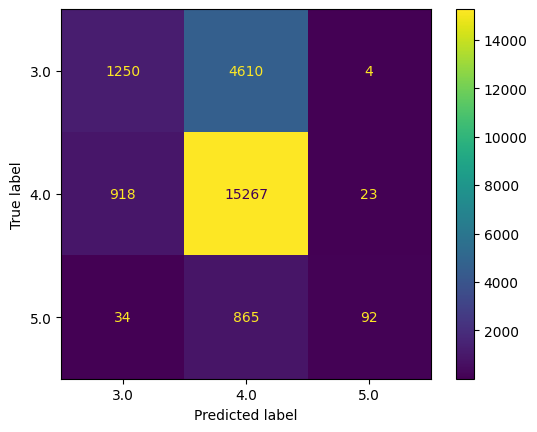

test_3.0_precision    0.567328
test_3.0_recall       0.213170
test_3.0_f1-score     0.309595
test_4.0_precision    0.736068
test_4.0_recall       0.941942
test_4.0_f1-score     0.826363
test_5.0_precision    0.799032
test_5.0_recall       0.092889
test_5.0_f1-score     0.164534
test_accuracy         0.720158
dtype: float64

In [17]:
initial_feature_sets = [GAUSSIAN_FEATURES, CATEGORICAL_FEATURES, MULTINOMIAL_FEATURES]

base_classifiers = [GaussianNB(),
                    CategoricalNB(alpha=1, min_categories=N_CAT_VALUES),
                    MultinomialNB(alpha=0.1)]

meta_classifier = CategoricalNB()
snb = StackingNB(base_classifiers, meta_classifier, initial_feature_sets)
snb.fit(X, y)

y_pred, snb_report = cross_val_report(snb, X, y)
snb_report